## 13.5 Homework

- a) Write a program that generates and prints out two random numbers between 1 and 6, to simulate the rolling of two dice.
- b) Modify your program to simulate the rolling of two dice a million times (N0) and count the number of times you get double six (N1). Calculate the probability of finding double six in your simulations (N1/N0) 
- c) Write a code to generate random integers within [-5, 5], find the magic series of {a, c, m} [Don't use the built-in function in numpy] 

Part a)

I use numpy's random number generator to generate random numbers between 1 and 6.

In [20]:
import numpy as np

x = np.random.randint(1, 1000)
np.random.seed(x)
roll1 = np.random.randint(1,6)
roll2 = np.random.randint(1,6)

print("Dice 1 = ", roll1)
print("Dice 2 = ", roll2)

Dice 1 =  4
Dice 2 =  4


Part b)

Now, I modify the program to simulate rolling two dice a million times.

In [105]:
import numpy as np

def rolldice(N):
    roll = []
    
    for i in range(N):
       # x = np.random.randint(1, 10000)
        #np.random.seed(x)
        roll.append(np.random.randint(1,7))
        #roll2.append(np.random.randint(1,6))
    return roll

def countsixes(N):
    count = 0
    
    roll1 = rolldice(N)
    roll2 = rolldice(N)
    
    for i in range(0,N):
        if roll1[i] == 6 and roll2[i] == 6:
            count += 1
    return count

#print(roll1)
print("Number of double sixes = ", countsixes(1000000))

Number of double sixes =  28174


With $N_o = 1000000$ and $N_1 = 28174$,

The probability of rolling double sixes is $p = \frac{N_o}{N_1} \approx 0.02$

This is about what I would expect based on calculating the probability of rolling double sixes in one roll, which is $p = \frac{1}{36} \approx .02$

In [2]:
import matplotlib.pyplot as plt



#results = []

def random1(N):
    #N = 100
    a = 1
    c = 1
    #m = 6 #4245035300
    x = 2
    results = []
    for i in range(N):      
        x = (a*x+c)%m 
        results.append(x)
    return results

results = random1(100)
plt.plot(results,"o")
plt.show()

plt.hist(results)
plt.show()

#print(results)

NameError: name 'm' is not defined

Depending on whether or not I set m = 6 or -6, I can get random number generation between 0 to 5, or 0 to -5. 
Thus, I need a way to generate both positive and negative values. 
I do this by trying to randomize whether m will be positive or negative.
I use the same linear congruential method, where I generate a list of random numbers between 0 and 5. I will then use this list to determine whether my m values will be positive (index value <3) or negative (index value >=3).

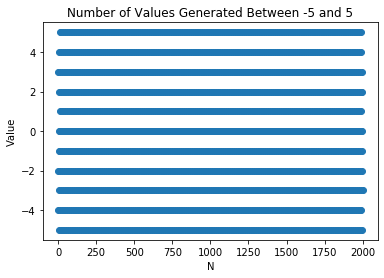

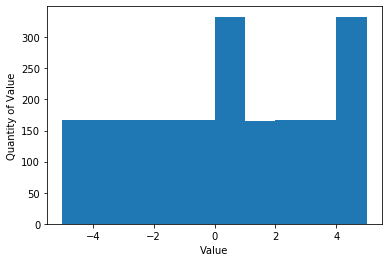

In [4]:

def random_m(N):
    y = 2
    n = int(2e31-1)
    b = 7**7
    d = 1
    value_m = []
    for i in range(N):
        y = (b*y+d)%n
        y = y%6
        value_m.append(y)
    return value_m
    
#print(random_m(100))

def random2(N):
    a = 7**7
    c = 1
    m = 6 #4245035300
    x = 1
    results = []
    value_m = random_m(N)
    for i in range(N):
        if value_m[i] >=3:
            m = -m
        else:
            m = m
        x = (a*x+c)%m 
        #x = x%6
        results.append(x)
    return results

randomlist = random2(2000)
#print(randomlist)

plt.plot(randomlist,"o")
plt.xlabel("N")
plt.ylabel("Value")
plt.title("Number of Values Generated Between -5 and 5")
plt.show()

plt.hist(randomlist)
plt.xlabel("Value")
plt.ylabel("Quantity of Value")
plt.show()

    
    

With this method of determining the sign (negative or positive) of m, I can generate numbers between -5 and 5. There is still some periodicity to this method, so the numbers are only semi-random. I also generate the values "1" and "5" with more frequency than the rest of the numbers.